#### code of AG vs gene (information of carry forward and non carry forward)

In [1]:
import pandas as pd
# meta = pd.read_excel("/home/bernadettem/bernadettenotebook/E.Coli_LTEE/genewise_analysis_08022024/MetaData_ecoli_final.xlsx", sheet_name="Gain score")
essentialgene = pd.read_excel("/home/bernadettem/bernadettenotebook/E.Coli_LTEE/genewise_analysis_08022024/essential gene.xlsx", sheet_name="Sheet2")
carry_forward = pd.read_csv("/home/bernadettem/bernadettenotebook/E.Coli_LTEE/genewise_analysis_08022024/carry_non_carry_forward.txt")

In [2]:
df = carry_forward.drop_duplicates(subset=['Gene', 'Position', 'label'])
df

,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,Gene,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain,sum of alt AC,number_of_mutations,mutation type
0,0,0,0,0,0,0,0,0,0,0,...,intergenic,A->C,noncoding,A,C,p6,-10.385914,1151,32,Carry forward
1,0,0,0,0,0,0,0,0,0,4,...,ffh,G->A,synonymous,G,A,p3,-0.828361,4247,98,Carry forward
2,0,1,1,1,0,0,0,0,2,1,...,ffh,A->C,missense,A,C,p4,2.722730,33,21,Carry forward
3,0,0,0,0,0,0,0,0,0,0,...,ffh,T->C,missense,T,C,p6,-0.628853,81,41,Carry forward
4,0,1,1,1,3,0,0,0,0,0,...,ffh,T->G,missense,T,G,p1,-9.932075,44,31,Carry forward
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36917,0,0,0,0,0,0,0,0,0,0,...,gshA,T->C,synonymous,T,C,m4,-6.696373,53,9,non carry forward
36918,0,0,0,0,0,0,0,0,0,0,...,ycbB,G->A,missense,G,A,p1,0.588571,19,8,non carry forward
36919,0,0,0,0,0,0,0,0,0,0,...,gshA,T->C,synonymous,T,C,m4,3.770744,107,12,non carry forward
36920,0,0,0,0,0,0,0,0,0,0,...,ycbB,C->T,missense,C,T,m1,-7.932601,12,7,non carry forward


In [3]:
df['Gene'] = df['Gene'].str.strip()

/tmp/ipykernel_434415/2095438592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gene'] = df['Gene'].str.strip()


In [4]:
df['seq_id'] = df['Position'].astype(str) + '_' + df['Gene'].astype(str)
df = df[df['Gene'] != 'intergenic']
df

/tmp/ipykernel_434415/4118664953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seq_id'] = df['Position'].astype(str) + '_' + df['Gene'].astype(str)


,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,AC:5000,AC:5500,AC:6000,...,Allele,Annotation,Ref_allele,Alt_allele,label,accumulated_gain,sum of alt AC,number_of_mutations,mutation type,seq_id
1,0,0,0,0,0,0,0,0,0,4,...,G->A,synonymous,G,A,p3,-0.828361,4247,98,Carry forward,2668503_ffh
2,0,1,1,1,0,0,0,0,2,1,...,A->C,missense,A,C,p4,2.722730,33,21,Carry forward,2668267_ffh
3,0,0,0,0,0,0,0,0,0,0,...,T->C,missense,T,C,p6,-0.628853,81,41,Carry forward,2668261_ffh
4,0,1,1,1,3,0,0,0,0,0,...,T->G,missense,T,G,p1,-9.932075,44,31,Carry forward,2668257_ffh
5,0,0,0,0,0,0,0,0,0,0,...,G->A,synonymous,G,A,p3,-2.876880,229,17,Carry forward,2668023_ffh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36917,0,0,0,0,0,0,0,0,0,0,...,T->C,synonymous,T,C,m4,-6.696373,53,9,non carry forward,2710663_gshA
36918,0,0,0,0,0,0,0,0,0,0,...,G->A,missense,G,A,p1,0.588571,19,8,non carry forward,999174_ycbB
36919,0,0,0,0,0,0,0,0,0,0,...,T->C,synonymous,T,C,m4,3.770744,107,12,non carry forward,2710213_gshA
36920,0,0,0,0,0,0,0,0,0,0,...,C->T,missense,C,T,m1,-7.932601,12,7,non carry forward,999246_ycbB


In [5]:
import pandas as pd

# Assuming dfT is your DataFrame containing the data
# Create a dictionary mapping labels to mutator/non-mutator
label_mapping = {
    'm1': 'mutator', 'm2': 'mutator', 'm3': 'mutator', 'm4': 'mutator',
    'p3': 'mutator', 'p6': 'mutator',
    'm5': 'nonmutator', 'm6': 'nonmutator', 'p1': 'nonmutator',
    'p2': 'nonmutator', 'p4': 'nonmutator', 'p5': 'nonmutator'
}

# Create a new column 'Mutator_Status' based on the 'label' column
df['Mutator_Status'] = df['label'].map(label_mapping)

# Display the updated DataFrame
df=df.copy()

/tmp/ipykernel_434415/2127003449.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mutator_Status'] = df['label'].map(label_mapping)


In [6]:
# Count the frequency of genes in the  dataframe
frequent_genes = df['Gene'].value_counts() 
# Convert the Series to a DataFrame with columns 'Gene' and 'Freq'
frequent_genes_df = pd.DataFrame({'Gene': frequent_genes.index, 'Freq': frequent_genes.values})
frequent_genes_df

,Gene,Freq
0,rpsH,103
1,ECB_03723,96
2,pyrB,92
3,bcsC,85
4,tonB,85
...,...,...
3970,yihT,1
3971,ycgI,1
3972,yiiU,1
3973,yfcL,1


In [7]:
# Calculate the median frequency of genes
median_freq = frequent_genes_df['Freq'].median()

# Display the median frequency
print("Median Frequency:", median_freq)

Median Frequency: 7.0


In [8]:
# Add a new column 'Group' based on the median frequency
frequent_genes_df['Group'] = frequent_genes_df['Freq'].apply(lambda x: 'Above Median' if x > median_freq else 'Below Median')

# Display the updated DataFrame
print(frequent_genes_df)

           Gene  Freq         Group
0          rpsH   103  Above Median
1     ECB_03723    96  Above Median
2          pyrB    92  Above Median
3          bcsC    85  Above Median
4          tonB    85  Above Median
...         ...   ...           ...
3970       yihT     1  Below Median
3971       ycgI     1  Below Median
3972       yiiU     1  Below Median
3973       yfcL     1  Below Median
3974       ybaB     1  Below Median

[3975 rows x 3 columns]


In [9]:
# Merge this sheet with the sheet having essential gene information 
merged_df = frequent_genes_df.merge(df, on='Gene', how='left')
merged_df

,Gene,Freq,Group,AC:0,AC:1000,AC:1500,AC:2000,AC:3000,AC:4000,AC:4500,...,Annotation,Ref_allele,Alt_allele,label,accumulated_gain,sum of alt AC,number_of_mutations,mutation type,seq_id,Mutator_Status
0,rpsH,103,Above Median,0,0,0,1,0,1,0,...,missense,C,A,p3,2.971199,143,68,Carry forward,3374118_rpsH,mutator
1,rpsH,103,Above Median,0,0,0,2,0,2,1,...,missense,C,A,p2,2.971199,48,31,Carry forward,3374118_rpsH,nonmutator
2,rpsH,103,Above Median,0,0,0,1,2,1,3,...,missense,C,A,m4,2.971199,133,59,Carry forward,3374118_rpsH,mutator
3,rpsH,103,Above Median,0,1,0,1,1,1,0,...,missense,C,A,m3,2.971199,74,54,Carry forward,3374118_rpsH,mutator
4,rpsH,103,Above Median,0,3,0,2,0,4,1,...,missense,T,G,p4,-6.492224,162,74,Carry forward,3374098_rpsH,nonmutator
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34296,yihT,1,Below Median,0,0,0,0,0,0,0,...,missense,A,G,p3,6.451835,78,8,non carry forward,4050419_yihT,mutator
34297,ycgI,1,Below Median,0,0,0,0,0,0,0,...,noncoding,A,G,m4,-5.832860,7838,87,Carry forward,1223822_ycgI,mutator
34298,yiiU,1,Below Median,0,0,0,0,0,0,0,...,missense,C,T,m2,-8.714091,43,19,Carry forward,4098145_yiiU,mutator
34299,yfcL,1,Below Median,0,0,0,0,0,1,0,...,missense,G,A,m2,-5.504284,48,17,Carry forward,2387562_yfcL,mutator


In [10]:
import pandas as pd

# Assuming dfT is your DataFrame containing the data
# Create a dictionary mapping labels to mutator/non-mutator
label_mapping = {
    'm1': 'mutator', 'm2': 'mutator', 'm3': 'mutator', 'm4': 'mutator',
    'p3': 'mutator', 'p6': 'mutator',
    'm5': 'nonmutator', 'm6': 'nonmutator', 'p1': 'nonmutator',
    'p2': 'nonmutator', 'p4': 'nonmutator', 'p5': 'nonmutator'
}

# Create a new column 'Mutator_Status' based on the 'label' column
merged_df['Mutator_Status'] = merged_df['label'].map(label_mapping)

# Display the updated DataFrame
merged_df=merged_df.copy()

In [11]:
# Seperate Mutator and non-mutator 
nonmutator=merged_df[merged_df.loc[:,"Mutator_Status"]=="nonmutator"]
mutator=merged_df[merged_df.loc[:,"Mutator_Status"]=="mutator"]

In [12]:
# For nonmutator
# Count the frequency of mutants per gene in the DataFrame 'nonmutator'
frequent_genes_df_nm = nonmutator['Gene'].value_counts()
# Convert the Series to a DataFrame with columns 'Gene' and 'Freq_mutants_per_gene'
frequent_genes_df_nm = pd.DataFrame({'Gene': frequent_genes_df_nm.index, 'Freq_nm': frequent_genes_df_nm.values})
frequent_genes_df_nm

,Gene,Freq_nm
0,ECB_00512,59
1,rpsH,49
2,pyrB,46
3,ECB_03723,44
4,tonB,38
...,...,...
1404,hcaD,1
1405,yjhQ,1
1406,yjaH,1
1407,ompG,1


In [13]:
topnm = frequent_genes_df_nm.sort_values(by='Freq_nm', ascending=False).head(20)
topnm['Gene'].unique()

array(['ECB_00512', 'rpsH', 'pyrB', 'ECB_03723', 'tonB', 'avtA', 'bcsC',
       'nagE', 'ydhB', 'fadH', 'ygcG', 'malT', 'yfcTU', 'sucA', 'ygjE',
       'cynR', 'hslU', 'ydcE', 'renD', 'pykF'], dtype=object)

In [14]:
# For mutator
# Count the frequency of genes in the DataFrame
frequent_genes_m = mutator['Gene'].value_counts()
# Convert the Series to a DataFrame with columns 'Gene' and 'Freq_gene'
frequent_genes_df_m = pd.DataFrame({'Gene': frequent_genes_m.index, 'Freq_m': frequent_genes_m.values})
frequent_genes_df_m

,Gene,Freq_m
0,yeeJ,74
1,bcsC,57
2,rpsH,54
3,ECB_03723,52
4,nagE,50
...,...,...
3955,lar,1
3956,cheY,1
3957,pspB,1
3958,pspE,1


In [15]:
topm = frequent_genes_df_m.sort_values(by='Freq_m', ascending=False).head(20)
topm['Gene'].unique()

array(['yeeJ', 'bcsC', 'rpsH', 'ECB_03723', 'nagE', 'tonB', 'pyrB',
       'metH', 'ECB_03460', 'lhr', 'malT', 'yfhM', 'mukB', 'yfaL', 'eaeH',
       'yehI', 'purL', 'ebgA', 'yphG', 'narG'], dtype=object)

In [16]:
# Merge this sheet with the sheet having essential gene information 
merged_df_m = topm.merge(merged_df, on='Gene', how='inner')
# Merge this sheet with the sheet having essential gene information 
merged_df_nm = topnm.merge(merged_df, on='Gene', how='inner')

/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

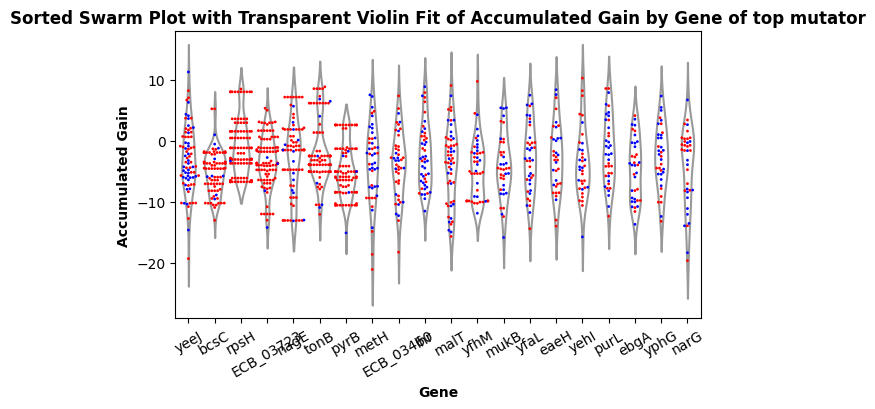

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for 'carry forward' and 'non carry forward'
color_carry_forward = 'red'
color_non_carry_forward = 'blue'

# Define a dictionary to map mutation types to colors
mutation_colors = {
    'Carry forward': color_carry_forward,
    'non carry forward': color_non_carry_forward
}

# Calculate median values of accumulated_gain for each gene
median_values = merged_df_m.groupby('Gene')['accumulated_gain'].median()

# Sort genes based on median values in descending order
sorted_genes = median_values.sort_values(ascending=False).index

# Reorder the dataframe based on sorted genes
top_genes_filtered_sorted = merged_df_m.set_index('Gene').loc[sorted_genes].reset_index()

# Plot the swarm plot with sorted genes
plt.figure(figsize=(6.2,4.2))
sns.swarmplot(x='Gene', y='accumulated_gain', data=merged_df_m, hue='mutation type', palette=mutation_colors, size=2, legend=False)
sns.violinplot(x='Gene', y='accumulated_gain', data=merged_df_m, inner=None, color="1", alpha=0.5, width=0.8)

# Set labels and title
plt.xlabel('Gene', fontweight='bold')
plt.ylabel('Accumulated Gain', fontweight='bold')
plt.title('Sorted Swarm Plot with Transparent Violin Fit of Accumulated Gain by Gene of top mutator', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=30)

# Add legend
# plt.legend(title='Mutation Type')

# Adjust layout and display plot
plt.tight_layout()
#plt.savefig("/home/bernadettem/bernadettenotebook/E.Coli_LTEE/genewise_analysis_08022024/AG vs Gene swarm and violin plot of top mutator.pdf", dpi = 600)
#plt.show()


/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 31.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 9.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/bernadettem/anaconda3/envs/notebook/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 28.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWa

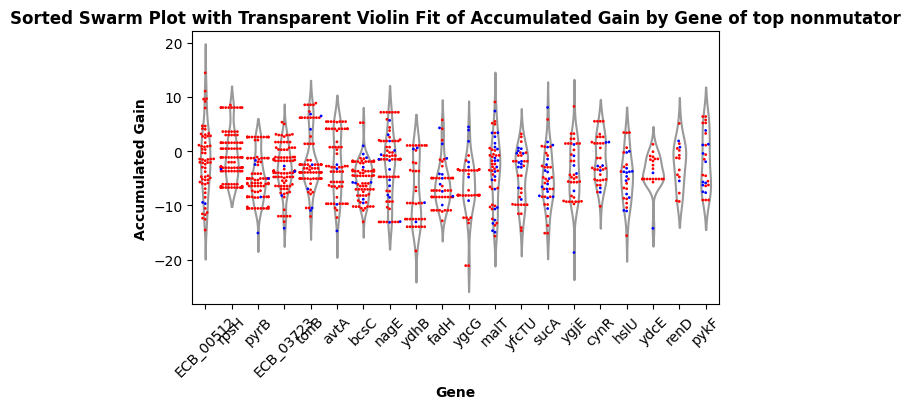

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the colors for 'carry forward' and 'non carry forward'
color_carry_forward = 'red'
color_non_carry_forward = 'blue'

# Define a dictionary to map mutation types to colors
mutation_colors = {
    'Carry forward': color_carry_forward,
    'non carry forward': color_non_carry_forward
}

# Calculate median values of accumulated_gain for each gene
median_values = merged_df_nm.groupby('Gene')['accumulated_gain'].median()

# Sort genes based on median values in descending order
sorted_genes = median_values.sort_values(ascending=False).index

# Reorder the dataframe based on sorted genes
top_genes_filtered_sorted = merged_df_nm.set_index('Gene').loc[sorted_genes].reset_index()

# Plot the swarm plot with sorted genes
plt.figure(figsize=(6.2,4.2))
sns.swarmplot(x='Gene', y='accumulated_gain', data=merged_df_nm, hue='mutation type', palette=mutation_colors, size=2,legend=False)
sns.violinplot(x='Gene', y='accumulated_gain', data=merged_df_nm, inner=None, color="1", alpha=0.5, width=0.8)

# Set labels and title
plt.xlabel('Gene', fontweight='bold')
plt.ylabel('Accumulated Gain', fontweight='bold')
plt.title('Sorted Swarm Plot with Transparent Violin Fit of Accumulated Gain by Gene of top nonmutator', fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
#plt.legend(title='Mutation Type')

# Adjust layout and display plot
plt.tight_layout()
#plt.savefig("/home/bernadettem/bernadettenotebook/E.Coli_LTEE/genewise_analysis_08022024/AG vs Gene swarm and violin plot of top nonmutator.pdf", dpi = 600)
#plt.show()
